<a href="https://colab.research.google.com/github/hkaido0718/IncompleteDiscreteChoice/blob/main/ModelPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# From the model to a graph

A discrete choice model's prediction can be summarized by a [bypartite graph](https://mathworld.wolfram.com/BipartiteGraph.html) with vertices $(\mathcal S,\mathcal Y)$ and edges $E$.

The idea is the following. There are two types of nodes. A $U$-node is a region $a\subseteq \mathcal U$ in the latent variable space. A $Y$-node is an outcome value $y$. There is an edge $(a,y)$ between the two vertices if
$$y= g(U|X;\theta),\text{ for } U\in a.$$

Below, we use the `IncompleteDiscreteChoice` library, which can be imported from a Github repository.

In [ ]:
!git clone https://github.com/hkaido0718/IncompleteDiscreteChoice.git

Cloning into 'IncompleteDiscreteChoice'...
remote: Enumerating objects: 55, done.
remote: Counting objects: 100% (55/55), done.
remote: Compressing objects: 100% (39/39), done.
remote: Total 55 (delta 22), reused 46 (delta 13), pack-reused 0
Receiving objects: 100% (55/55), 27.92 KiB | 621.00 KiB/s, done.
Resolving deltas: 100% (22/22), done.


## Example 1: Binary choice

For example, in the binary choice model
\begin{align}
g(U|X;\theta)=\begin{cases}
1 & U\in a\\
0 & U\in b.
\end{cases}
\end{align}
If $U$ falls in $a$, $y=1$ is predicted. Similarly, if $U$ falls in $b$, $y=0$ is predicted.

So, the nodes are the following.


*   $Y$-nodes: $\mathcal Y=\{0,1\}$
*   $U$-nodes: $\mathcal U=\{ a,b\}$

You can see that the $U$-nodes form a partition of the support of $U$.




Now, let's determine the edges to summarize this model using a bipartite graph. $y=1$ occurs when $U$ falls in $a$.
Similarly,
$y=0$ occurs when $U$ falls in $b$.

Hence, the edges are $(0,b)$ and $(1,a)$. This model can be stored as a BipartiteGraph class.

In [ ]:
import IncompleteDiscreteChoice.idclib as idc

# Define the Y-nodes and U-nodes
Y_nodes = [0,1]
U_nodes = ['a','b']

edges = [('b',0),('a',1)]

# Create a bipartite graph using the idc library
gmodel = idc.BipartiteGraph(Y_nodes,U_nodes,edges)

Let's plot this graph.

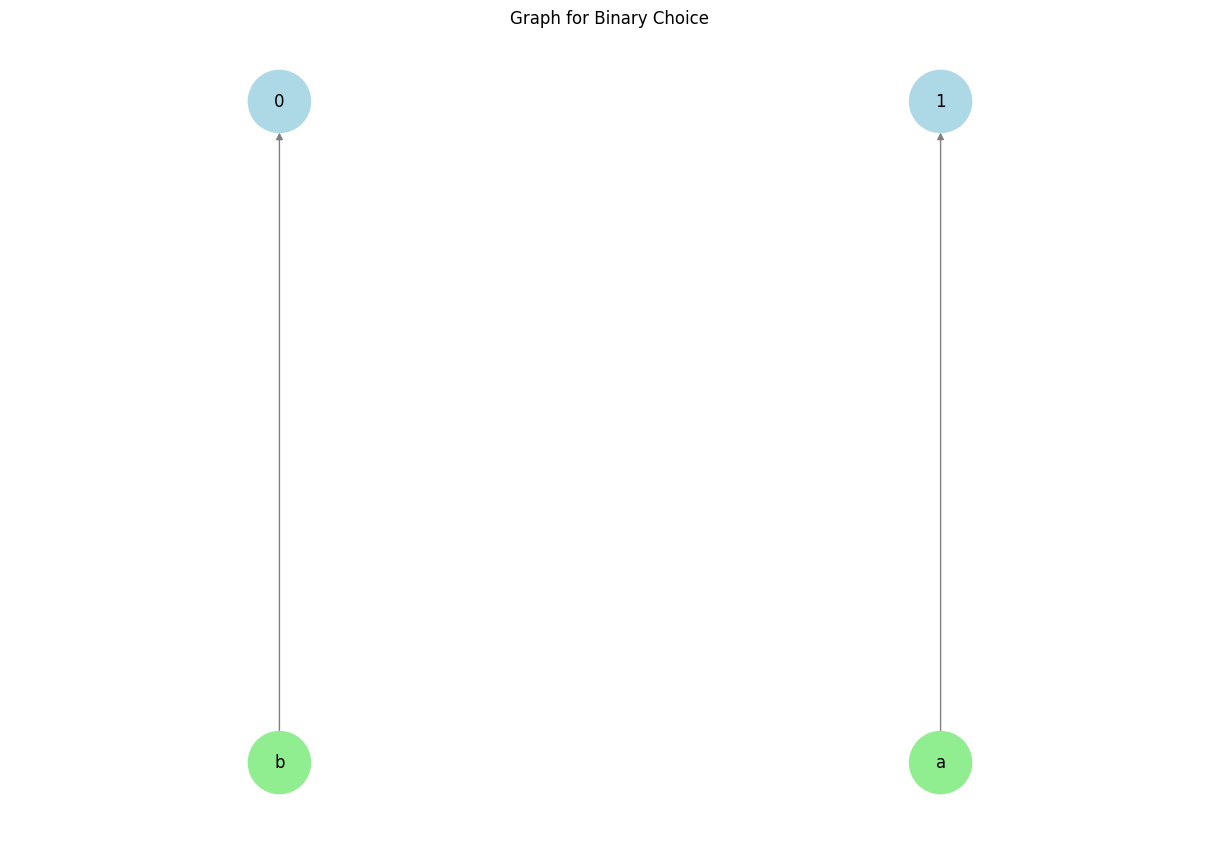

In [ ]:
pos = {0: (0, 1), 1: (1, 1), 'b': (0, 0), 'a': (1, 0)}
# Plot the graph
gmodel.plot_graph(pos, title='Graph for Binary Choice')

# Conditional choice probabilities (CCPs)

From each $U$-node, there is a unique $Y$-node linked by an edge. This occurs in any complete model. While the graph does not need to be directed, it is useful to consider a flow of a probability mass from a $U$-node (e.g., "a") to the corresponding $Y$-node (e.g., 1).

This allows us to link the probability distribution assigned by $F_\theta$ over the $U$-nodes to the conditional choice probabilities over the $Y$-nodes. For example,
$$P(Y=1|x)=F_\theta(U\in a|x).$$

</br>

## Remark:
If we make a further assumption, such as $U$ is independent of $X$ and $U\sim N(0,1)$,
$$P(Y=1|x)=F_\theta(U\in a|x)=F_\theta(U\ge -X'\theta)=1-\Phi(-x'\theta)=\Phi(x'\theta).$$
This is the well-known probit model.

## Example 2: Entry game

Next, let's consider the entry game. For this, we generalize the definition of edges because the model is incomplete. We draw an edge between a $U$-node $a$ and a $Y$-node $y$ if
\begin{align}
y\in G(U|X;\theta),~\text{ for }U\in a.
\end{align}


In [ ]:
# Define the Y-nodes
Y_nodes = [(0,0), (0,1), (1,0) ,(1,1)]

# Define the U-nodes
U_nodes = ['a','b','c','d','e']

# Add edges between nodes
edges = [
    ('a', (0,0)),
    ('b', (0,1)),
    ('c', (1,0)),
    ('d', (1,1)),
    ('e', (0,1)),
    ('e', (1,0))
]

# Create a bipartite graph using the idc library
gentrymodel = idc.BipartiteGraph(Y_nodes,U_nodes,edges)


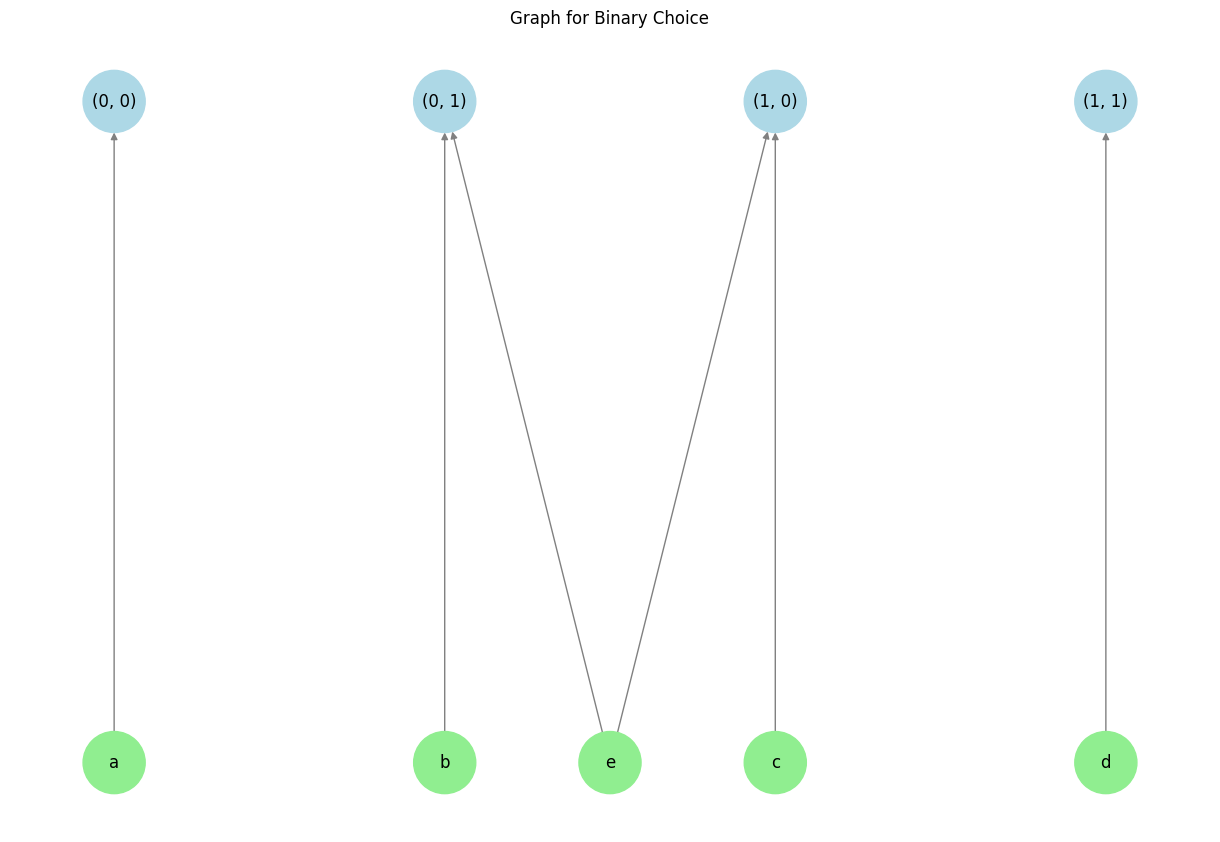

In [ ]:
# Define positions for the nodes in a bipartite layout
pos = {
    (0,0): (-1.5, 1), (0,1): (-0.5, 1), (1,0): (0.5, 1), (1,1): (1.5, 1),
    'a': (-1.5, -1), 'b': (-0.5, -1), 'c': (0.5, -1), 'd': (1.5, -1), 'e': (0, -1)
}
gentrymodel.plot_graph(pos, title='Graph for Binary Choice')

# CCP again

In the example above, $F_\theta$ determines how probabilities are allocated across the $U$-nodes (i.e. the green nodes). In complete models, that automatically determined how the probabilities are allocated across the $Y$-nodes (i.e. blue nodes). However, that's no longer the case here. Look at node $e$. The probability assigned to this node may either flow into $(0,1)$ or $(1,0)$. So, the probability allocation across the four outcomes is not uniquely determined. This is the key feature of an incomplete model.

## A numerical example

Suppose $F_\theta$ assigns equal probabilities across the green nodes.

 $(F_\theta(a),F_\theta(b),F_\theta(c),F_\theta(d),F_\theta(e))=(0.2,0.2,0.2,0.2,0.2)$

The following probability allocations are all compatible with $F_\theta$ and the graph.

1. $(p_\theta(0,0),p_\theta(0,1),p_\theta(1,0),p_\theta(1,1))=(0.2,0.4,0.2,0.2)$
2. $(p_\theta(0,0),p_\theta(0,1),p_\theta(1,0),p_\theta(1,1))=(0.2,0.3,0.3,0.2)$
3. $(p_\theta(0,0),p_\theta(0,1),p_\theta(1,0),p_\theta(1,1))=(0.2,0.2,0.4,0.2)$

The first one directs all the mass allocated to $e$ to $(0,1)$. The third one is the opposite. The second one splits the mass into equal halves and directs them to (0,1) and (1,0). Since how you split the mass is arbitrary, you can consider an infinite number of choice probabilities.

In the next note (`Inequalities.ipynb`), we discuss how to obtain _sharp identifying restrictions_ from the graph.